In [18]:
from sklearn import datasets
from qmeans import qkmeans as qk
from qiskit import Aer
from itertools import combinations
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

In [19]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [20]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
backend = Aer.get_backend('aer_simulator')

In [22]:
qkmeans = qk.QuantumKMeans(backend=backend, 
                                     n_clusters=4,
                                     init='random', 
                                     verbose=True, 
                                     map_type='probability', 
                                     tol=0.01, shots=10000)

In [28]:
qkmeans.fit(X, batch = False)

Data is: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

QuantumKMeans(backend=AerSimulator('aer_simulator'), n_clusters=4, shots=10000,
              tol=0.01, verbose=True)

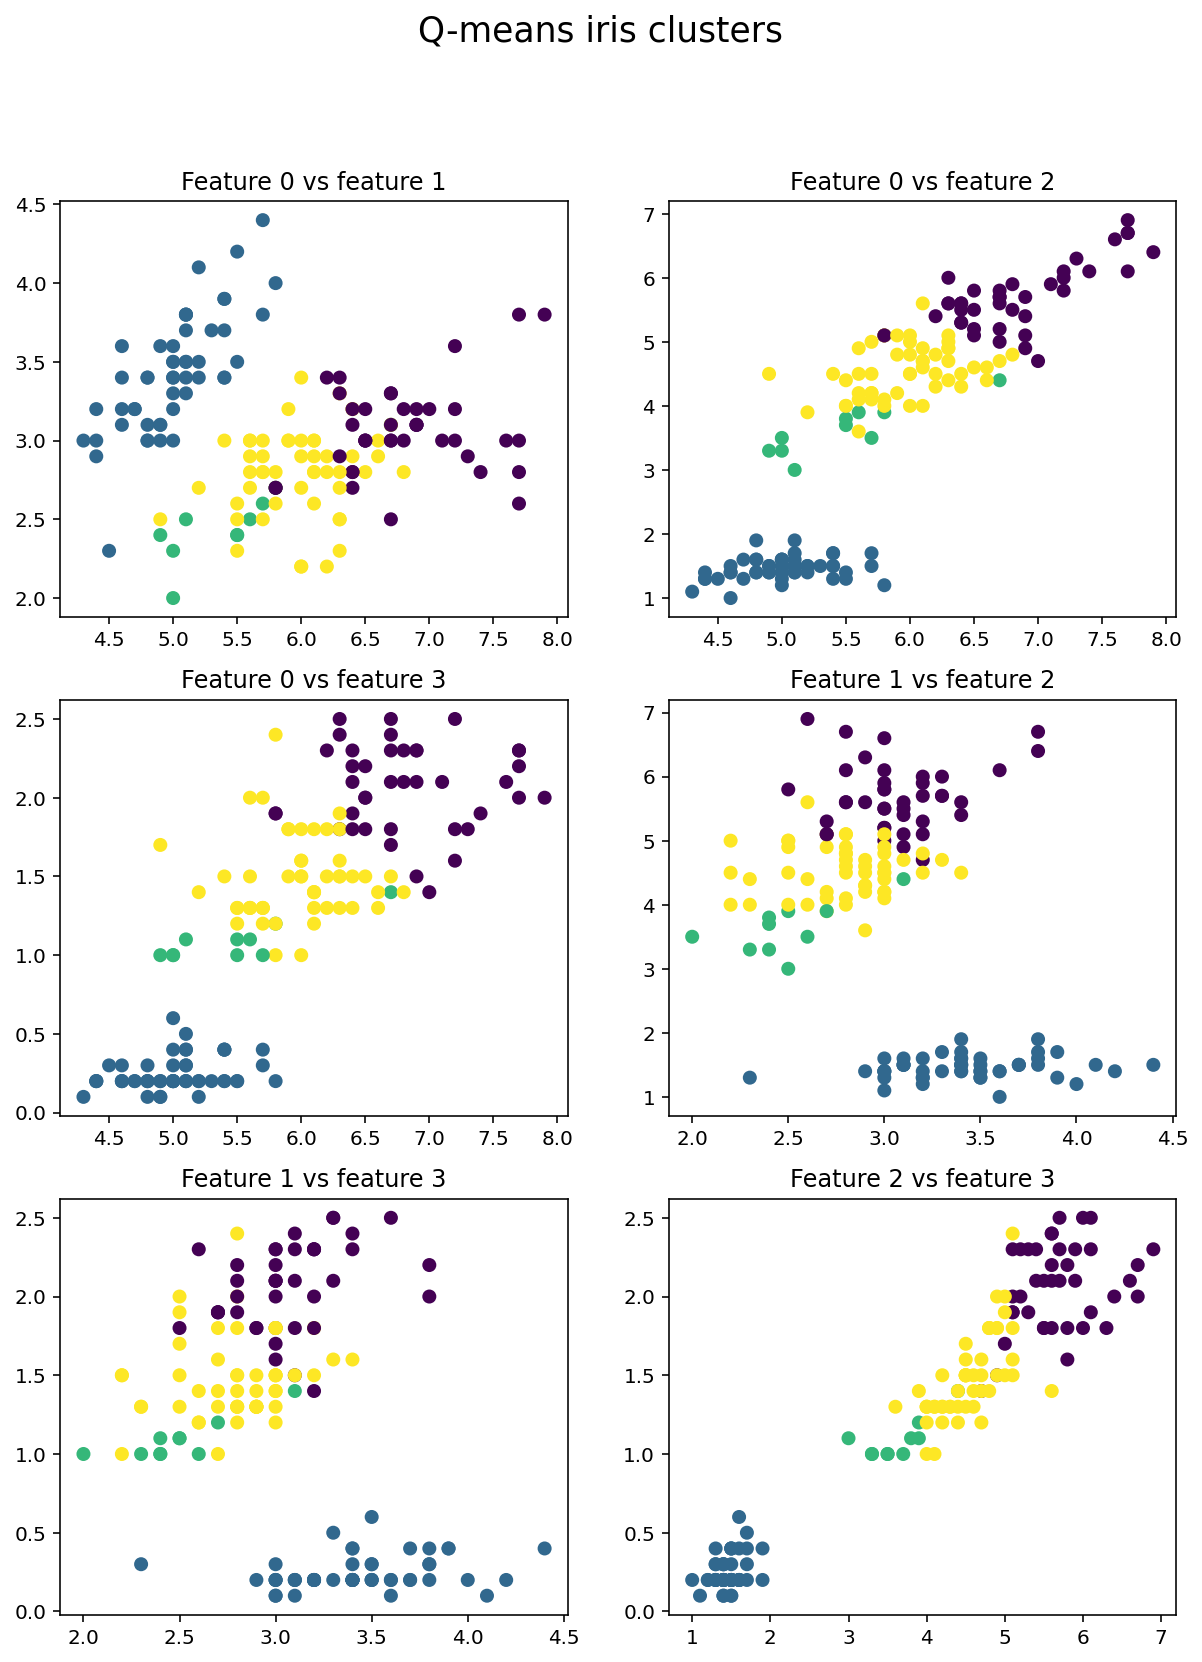

In [27]:
pairs = list(combinations(list(range(len(X[0]))), 2))

fig = plt.figure(figsize=(10,13))

for i, pair in enumerate(pairs):
    
    ax = fig.add_subplot(3,2,i+1)
    ax.scatter(X[:,pair[0]], X[:,pair[1]], c=qkmeans.labels_)
    ax.set_title(f"Feature {pair[0]} vs feature {pair[1]}")

fig.suptitle("Q-means iris clusters", fontsize="xx-large")
plt.show()

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table